# dibagian ini adalah percobaan untuk TextBlob.Sentiment

In [ ]:
import pandas as pd

In [2]:
data = pd.read_csv("SeribuData_Corpus_Indihome_V2.csv")
data

,Tgl,Tweet,ISP
0,6/13/2020 5:01,cacaaaatttttttttt,Indohome
1,6/13/2020 5:01,pagi min refund uang full mohon penjelasannya,Indohome
2,6/13/2020 5:01,min internet mati lampu pon warna merah lapor ...,Indohome
3,6/13/2020 5:00,udah benerrr sobat semalem aneh aja tbtb disco...,Indohome
4,6/13/2020 5:00,cek point,Indohome
...,...,...,...
995,6/12/2020 16:30,makasii lho saa,Indohome
996,6/12/2020 16:29,om,Indohome
997,6/12/2020 16:29,hi ga lemot gasih lg streaming tkem astaghfiru...,Indohome
998,6/12/2020 16:28,iya gitu mang sabar gangguan,Indohome


In [3]:
from textblob import TextBlob

In [6]:
data.columns
data["Tweet"] = data['Tweet'].astype(str)

In [7]:
Data_polarity = lambda x: TextBlob(x).sentiment.polarity
Data_subjective = lambda x: TextBlob(x).sentiment.subjectivity

data['Polarity'] = data['Tweet'].apply(Data_polarity)
data['Subjectivity'] = data['Tweet'].apply(Data_subjective)

data

,Tgl,Tweet,ISP,Polarity,Subjectivity
0,6/13/2020 5:01,cacaaaatttttttttt,Indohome,0.00,0.00
1,6/13/2020 5:01,pagi min refund uang full mohon penjelasannya,Indohome,0.35,0.55
2,6/13/2020 5:01,min internet mati lampu pon warna merah lapor ...,Indohome,0.00,0.00
3,6/13/2020 5:00,udah benerrr sobat semalem aneh aja tbtb disco...,Indohome,0.00,0.00
4,6/13/2020 5:00,cek point,Indohome,0.00,0.00
...,...,...,...,...,...
995,6/12/2020 16:30,makasii lho saa,Indohome,0.00,0.00
996,6/12/2020 16:29,om,Indohome,0.00,0.00
997,6/12/2020 16:29,hi ga lemot gasih lg streaming tkem astaghfiru...,Indohome,0.00,0.00
998,6/12/2020 16:28,iya gitu mang sabar gangguan,Indohome,0.00,0.00


In [14]:
data['Polarity']

0      0.00
1      0.35
2      0.00
3      0.00
4      0.00
       ... 
995    0.00
996    0.00
997    0.00
998    0.00
999    0.00
Name: Polarity, Length: 1000, dtype: float64

In [20]:
#untuk menambahkan sentimen positif, negatif / netral dari polarity yg sudah dihitung
def Sentimen(data):
    if data['Polarity'] > 0:
        val = 'Positif'
    elif data['Polarity'] < 0:
        val = 'Negatif'
    elif data['Polarity'] == 0.0:
        val = 'Netral'
    return val
        
data['Sentimen'] = data.apply(Sentimen, axis=1)

data.to_csv("DataIndihome_DenganSentimen.csv", index = False) #menyimpan ke file csv baru

In [23]:
#dibagian ini dari data yg sdh memiliki sentimen tadi dibuat visual nya dalam bentuk Grafik
import matplotlib.pyplot as plt
import seaborn as sns

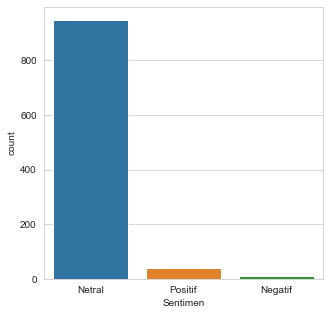

In [28]:
plt.figure(figsize=(5,5))
sns.set_style('whitegrid')
ax = sns.countplot(x = 'Sentimen', data=data)